# Aula 1
Python, Pandas e Colab

## Teoria

In [0]:
import pandas as pd

In [76]:
#importando a base de dados dos filmes
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [77]:
filmes.columns=["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [78]:
#importando a base de dados das avaliações dos filmes
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [79]:
avaliacoes.shape
#saída(linhas, colunas)

(100836, 4)

In [80]:
len(avaliacoes)

100836

In [81]:
#renomear as colunas do df avaliações
avaliacoes.columns=["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [82]:
#levantar avaliações do filmeId = 1
#usando o método query
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [83]:
#usando o método describe temos uma analise estátistica descritiva
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [84]:
#podemos ser mais específico, como abaixo mostrará a médias de todas as colunas 
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [85]:
#calcular a nota média de avaliacoes
avaliacoes["nota"].mean()

3.501556983616962

In [86]:
#calcular a nota média do filme 1
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

In [87]:
#calcular a nota média de cada um dos filmes
#agrupar os filmes utilizando o método groupby, parametro filmeId
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [88]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [89]:
#criar um novo dataframe para relacionar as notas com o nome do filme
#juntando "filmes" com "notas_medias_por_filme" parametro "filmeId" 
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [90]:
#mostrar as notas do dataframe de forma ordenada, decrescente
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


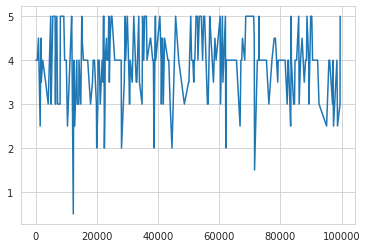

In [91]:
#criar um gráfico simples do df avaliaçoes das notas do filme 1
#por padrão será um gráfio de linha
avaliacoes.query("filmeId==1")["nota"].plot()

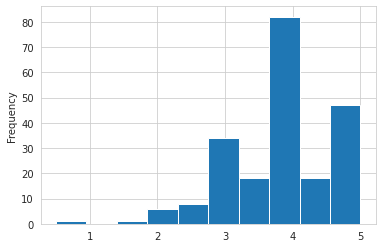

In [92]:
#melhorar o gráfico e fazer um histograma
avaliacoes.query("filmeId==1")["nota"].plot(kind="hist")

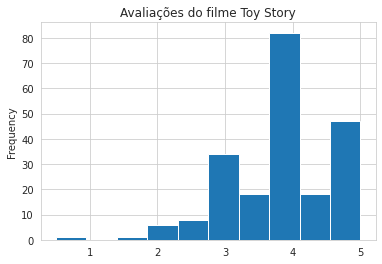

In [93]:
#adicionar um título ao gráfico
avaliacoes.query("filmeId==1")["nota"].plot(kind="hist", title="Avaliações do filme Toy Story")

In [0]:
#utilizar o matplotlib para fazer os gráficos
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

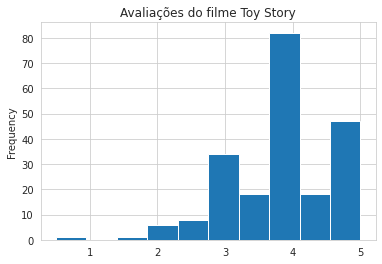

In [95]:
avaliacoes.query("filmeId==1")["nota"].plot(kind="hist")
plt.title("Avaliações do filme Toy Story")
plt.show

<function matplotlib.pyplot.show>

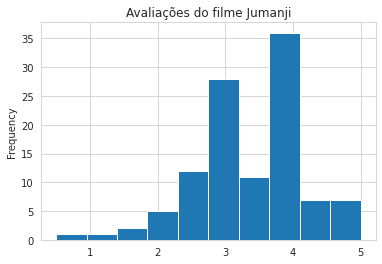

In [96]:
avaliacoes.query("filmeId==2")["nota"].plot(kind="hist")
plt.title("Avaliações do filme Jumanji")
plt.show

Text(0.5, 1.0, 'Avaliações do filme Justice League: Doom')

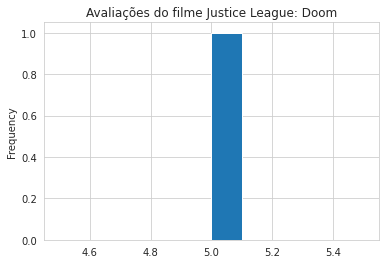

In [97]:
avaliacoes.query("filmeId==102084")["nota"].plot(kind="hist")
plt.title("Avaliações do filme Justice League: Doom")

## Desafio 1 do Paulo Silveira - errado
O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [98]:
filmes_com_media.sort_values("nota", ascending=True).head(18)

,filmeId,titulo,generos,nota
5554,26696,Lionheart (1990),Action,0.5
2689,3604,Gypsy (1962),Musical,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
9117,145724,Idaho Transfer (1973),Sci-Fi,0.5
7297,76030,Case 39 (2009),Horror|Thriller,0.5
9121,145951,Bloodsport: The Dark Kumite (1999),Action|Thriller,0.5
7553,85334,Hard Ticket to Hawaii (1987),Action|Comedy,0.5
8782,129250,Superfast! (2015),(no genres listed),0.5
8143,102025,Yongary: Monster from the Deep (1967),Children|Horror|Sci-Fi,0.5
9590,175475,The Emoji Movie (2017),Animation|Children|Comedy,0.5


## Desafio 1 do Paulo Silveira - Corrigido

In [99]:
selecao = filmes_com_media['nota'].isnull() #separa nota que é "null"
filmes_com_media[selecao] #mostra quais filmes não tiveram nota

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2 do Guilherme Silveira - OK
Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [100]:
filmes_com_media.rename(columns={"nota" : "nota_media"}, inplace=True)
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3 do Guilherme Silveira - OK
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [101]:
qtd_notas_filme = avaliacoes.groupby("filmeId")["usuarioId"].count()
#utilizar o groupby para agrupar por filme e contar quantos usuários votaram no filme

filmes_qtd_notas = filmes.join(qtd_notas_filme, on="filmeId")
filmes_qtd_notas.rename(columns={"usuarioId": "qtdNotas"}, inplace=True)
filmes_qtd_notas.head()

,filmeId,titulo,generos,qtdNotas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0


## Desafio 4 do Thiago Gonçalves - OK
Arredondar as médias (coluna de nota média) para duas casas decimais.

In [102]:
filmes_com_media = filmes_com_media.round({"nota_media":2})
filmes_com_media

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


## Desafio 5 do Allan Spadini - OK
Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)


In [103]:
generos_separados = filmes_com_media["generos"].str.get_dummies("|")
#Split each string in the Series by sep and return a DataFrame of dummy/indicator variables.
tipos_generos = generos_separados.columns
tipos_generos

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

## Desafio 5 do Alla Spadini - Melhorado

In [104]:
generos_separados = filmes_com_media["generos"].str.get_dummies("|")
tipos_generos = generos_separados.columns.to_list() #vai mostrar como uma lista
tipos_generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

## Desafio 6 da Thais André - OK
Contar o número de aparições de cada genero.

In [105]:
qtd_generos = generos_separados.sum().sort_values(ascending = False)
qtd_generos

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

## Desafio 7 do Guilherme Silveira - OK
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

<function matplotlib.pyplot.show>

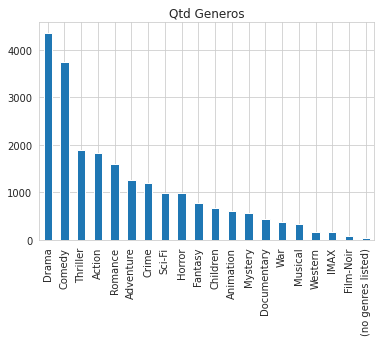

In [106]:
qtd_generos.plot(kind="bar")
plt.title("Qtd Generos")
plt.show

# Aula 2
Médias, medianas e visualização de dados.

## Teoria

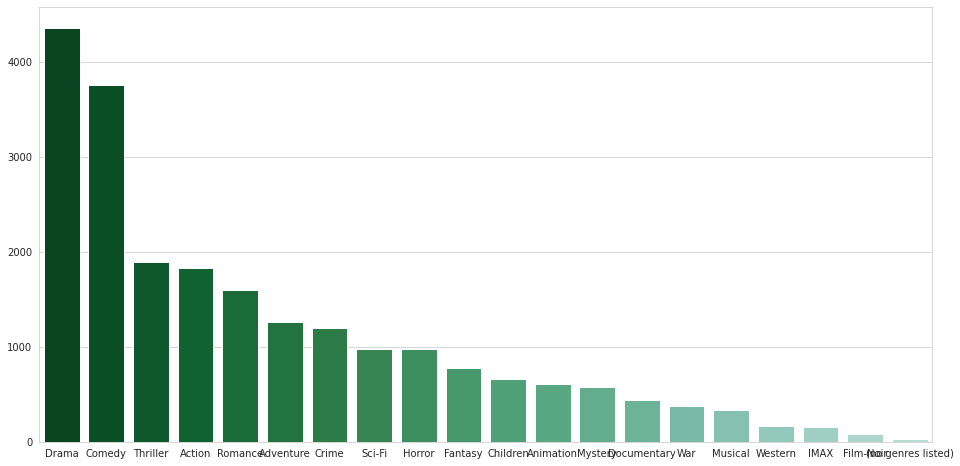

In [107]:
#importar o seaborn para melhor o gráfico
import seaborn as sns
sns.set_style("whitegrid") #adicionar linha de grade horizontal

filmes_por_genero = filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+8)) #somado mais 8 para melhorar a cor dos valores menores
plt.show()

In [108]:
#mostrar uma lista dos filmes entre as posiçoes 2450 e 2500
filmes_com_media.sort_values("nota_media", ascending=False)[2450:2500]

,filmeId,titulo,generos,nota_media
8765,128620,Victoria (2015),Crime|Drama|Romance,3.90
599,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,3.90
5480,26258,"Topo, El (1970)",Fantasy|Western,3.90
4795,7143,"Last Samurai, The (2003)",Action|Adventure|Drama|War,3.90
5451,26084,"Music Man, The (1962)",Children|Comedy|Musical|Romance,3.90
3016,4034,Traffic (2000),Crime|Drama|Thriller,3.90
4100,5876,"Quiet American, The (2002)",Drama|Thriller|War,3.90
2894,3871,Shane (1953),Drama|Western,3.90
6580,55247,Into the Wild (2007),Action|Adventure|Drama,3.90
2156,2871,Deliverance (1972),Adventure|Drama|Thriller,3.90


In [0]:
#criar a 1a função
#n = filmeId
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"] #avaliações ainda está com o campo nota, usando F-string para fazer a interpolação dos dados
  notas_do_filme.plot(kind="hist") #gráfico tipo histograma das notas
  return notas_do_filme.describe() #valores de estatistica descritiva

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

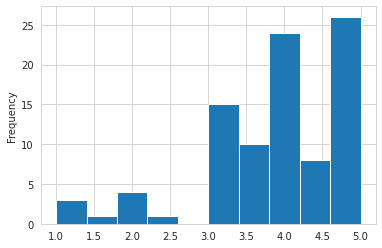

In [110]:
#filmeId=919 - Wizarf of Oz, The (1939)
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

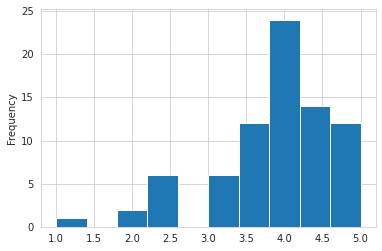

In [111]:
#filmeId=46578 , Little Miss Sunshine
plot_filme(46578)

In [0]:
#vamos adicionar o gráfico do boxplot no pandas
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')                 #pula linha
  notas_do_filme.plot.box()   #gráfico do boxplot
  plt.show()
  return notas_do_filme.describe()

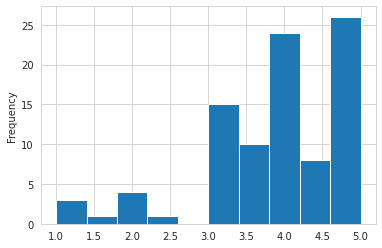

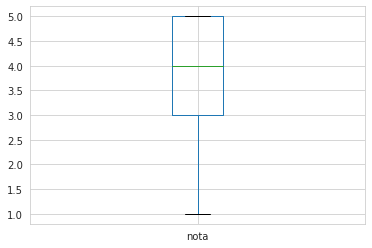

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [113]:
#filmeId=919 - Wizarf of Oz, The (1939)
plot_filme(919)

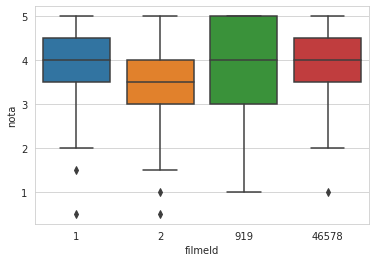

In [114]:
#usar o seaborn para mostrar o boxplot
#filmeId 1 = toystory, 2=Jumanji, 919=Magico de Oz, 46578=Little Miss Sunshine

sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"),x="filmeId", y="nota")

## Desafio 1 do Guilherme Silveira
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

[Text(0, 0, 'Drama'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Action'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'Children'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Documentary'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Musical'),
 Text(0, 0, 'Western'),
 Text(0, 0, 'IMAX'),
 Text(0, 0, 'Film-Noir'),
 Text(0, 0, '(no genres listed)')]

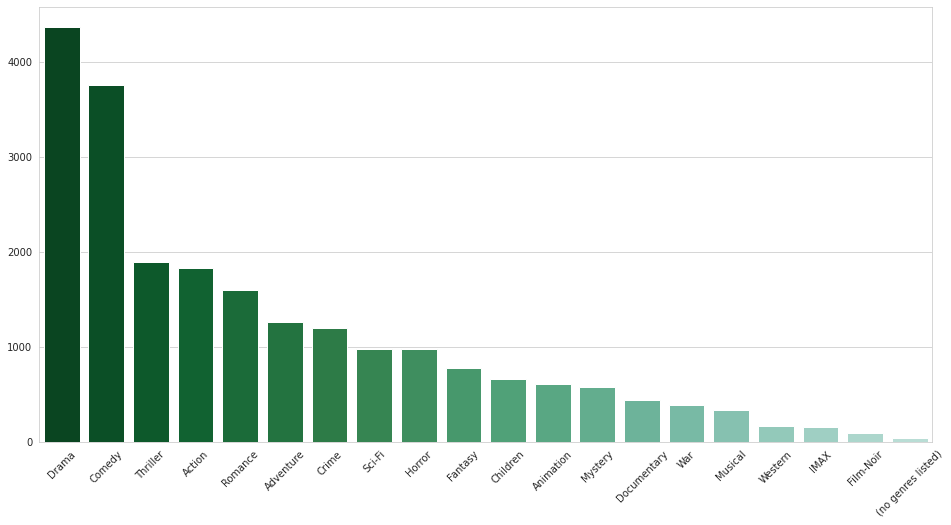

In [115]:
filmes_por_genero = filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
grafico = sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+8))

grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45)

## Desafio 2 do Paulo Silveira
Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

## Desafio 3 do Paulo Silveira
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

## Desafio 4 do Guilherme Silveira
Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

In [117]:
#usar o seaborn para mostrar o boxplot
#filmeId 1 = toystory, 2=Jumanji, 919=Magico de Oz, 46578=Little Miss Sunshine
analise = avaliacoes.query("filmeId in [1,2,919,46578]")
analiseFilmes = analise.join(filmes, on="filmeId")
analiseFilmes
#plot = sns.boxplot(data = analiseFilmes, x="filmeId", y="nota")

ValueError: ignored